## Project Goals

The main goal of this project is to analyze customer purchasing behavior using the Instacart Online Grocery Shopping dataset. By exploring orders, products, and user activity, we aim to understand how customers shop, which products are most popular, and how items are purchased together.

 The analysis will cover:
- **Exploratory Data Analysis (EDA)** to understand the distribution of orders in time (days of week, hours of day), basket sizes, and reorder rate.
- **Product Analysis** to identify the most popular products, aisles, and departments.
- **Customer Behavior Analysis** focusing on reorder tendencies and time between purchases.
- **SQL Queries** for structured data analysis and validation of results.
- **Visualizations** to clearly present key findings.

## Research Questions
1. When do customers place most of their orders (days of week, hours of day)?
2. What is the average basket size, and how does it vary across orders?
3. Which products, aisles, and departments are the most frequently purchased?
4. Which products have the highest reorder rates?
5. How often do customers reorder and what is the typical time gap between orders?
6. What products are most often ordered in the first basket?
7. What business insights can be derived to improve product recommendations?


### Import the main libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read files

In [29]:
orders = pd.read_csv("../data/orders.csv")
products = pd.read_csv("../data/products.csv")
order_products_prior = pd.read_csv("../data/order_products__prior.csv")
order_products_train = pd.read_csv("../data/order_products__train.csv")
aisles = pd.read_csv("../data/aisles.csv")
departments = pd.read_csv("../data/departments.csv")

In [30]:
def check_dataframe(df: pd.DataFrame, name: str, n=3):
    """Перевіряє базову якість даних"""
    display(pd.DataFrame({
        "rows": [df.shape[0]],
        "columns": [df.shape[1]],
        "nulls": [df.isnull().sum().sum()],
        "duplicates": [df.duplicated().sum()]
    }, index=[name]))
    display(df.head(n))


In [31]:
datasets = {
    "Orders": orders,
    "Products": products,
    "Order_Products_Prior": order_products_prior,
    "Order_Products_Train": order_products_train,
    "Aisles": aisles,
    "Departments": departments
}

for name, df in datasets.items():
    check_dataframe(df, name)

,rows,columns,nulls,duplicates
Orders,3421083,7,206209,0


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


,rows,columns,nulls,duplicates
Products,49688,4,0,0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


,rows,columns,nulls,duplicates
Order_Products_Prior,32434489,4,0,0


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


,rows,columns,nulls,duplicates
Order_Products_Train,1384617,4,0,0


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0


,rows,columns,nulls,duplicates
Aisles,134,2,0,0


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


,rows,columns,nulls,duplicates
Departments,21,2,0,0


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


## Goal: to verify user behavior over time.

### Distribution of orders by day of week

In [32]:
dow_counts = orders['order_dow'].value_counts().sort_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\2058910880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_counts.index, y=dow_counts.values, palette="Reds")


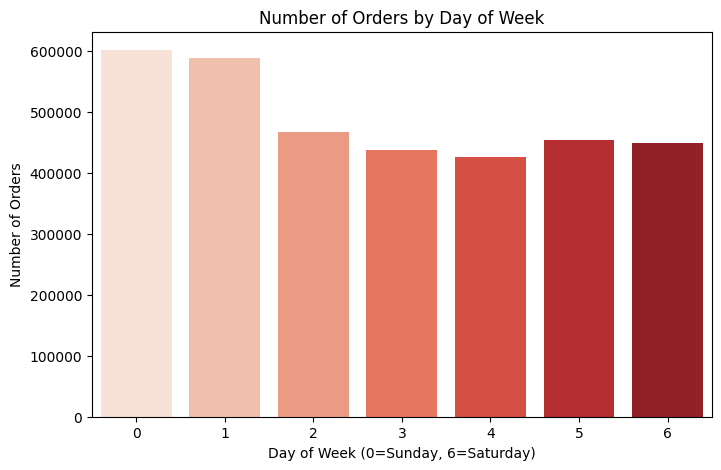

In [81]:
plt.figure(figsize=(8,5))
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette="Reds")
plt.title("Number of Orders by Day of Week")
plt.xlabel("Day of Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Orders")
plt.savefig("../visuals/number_orders_dayofweek.png")
plt.show()


### Distribution of orders by hour of day

In [34]:
hour_counts = orders['order_hour_of_day'].value_counts().sort_index()

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\3853878055.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="Reds")


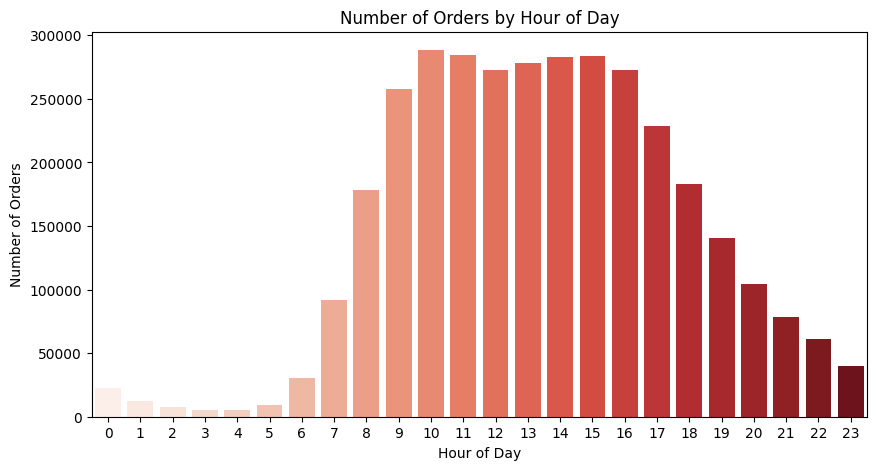

In [82]:
plt.figure(figsize=(10,5))
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="Reds")
plt.title("Number of Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.savefig("../visuals/number_orders_hourofdays.png")
plt.show()

##  Basket size (number of products per order)

In [36]:
cart_size = order_products_prior.groupby("order_id")["product_id"].count()

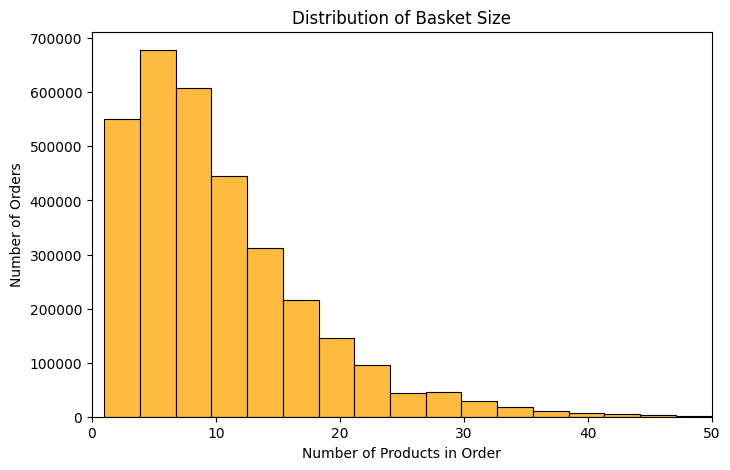

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(cart_size, bins=50, kde=False, color="orange")
plt.title("Distribution of Basket Size")
plt.xlabel("Number of Products in Order")
plt.ylabel("Number of Orders")
plt.xlim(0,50)
plt.savefig("../visuals/distri_basket_size.png")
plt.show()

> Average basket size:

In [84]:
int(cart_size.mean())

10

> Median basket size:

In [85]:
int(cart_size.median())

8

## Goal: Understand which products, aisles, and departments are the most popular.

### Top-10 products

In [40]:
products_orders = order_products_prior.merge(products, on="product_id")

In [41]:
top_products = (products_orders['product_name']
                .value_counts()
                .head(10))

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\3217108789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")


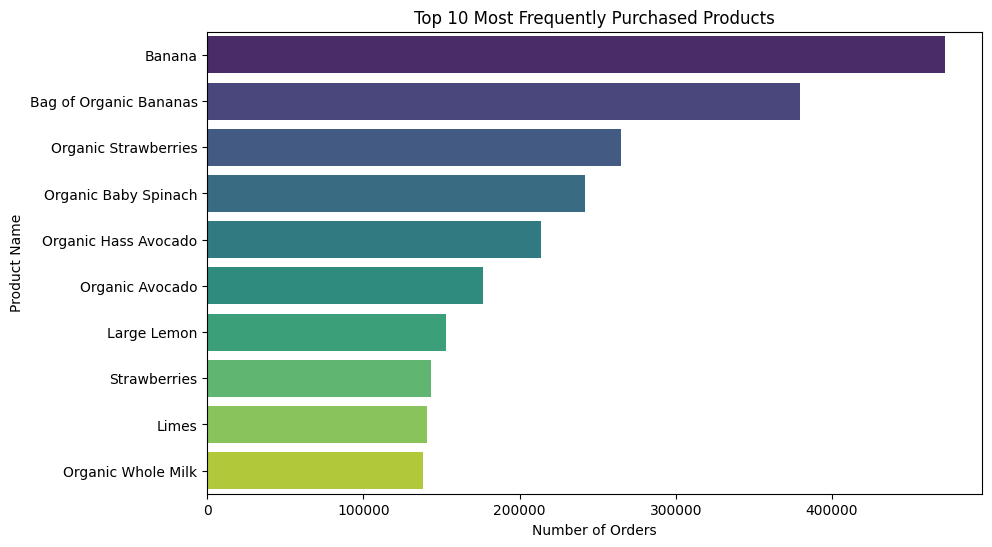

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_products.index, x=top_products.values, palette="viridis")
plt.title("Top 10 Most Frequently Purchased Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.savefig("../visuals/top_10_products.png")
plt.show()

In [87]:
top_products

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

### Top-10 aisles

In [44]:
products_orders = products_orders.merge(aisles, on="aisle_id")

In [45]:
top_aisles = (products_orders['aisle']
              .value_counts()
              .head(10))

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\2596563934.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_aisles.index, x=top_aisles.values, palette="plasma")


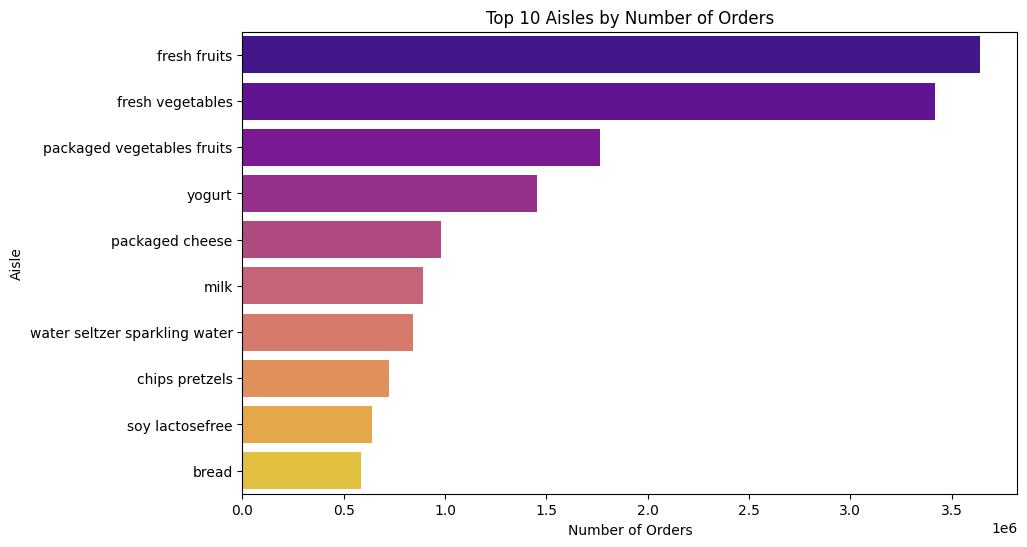

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_aisles.index, x=top_aisles.values, palette="plasma")
plt.title("Top 10 Aisles by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Aisle")
plt.savefig("../visuals/top_10_aisles.png")
plt.show()

In [47]:
top_aisles

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: count, dtype: int64

### Top-10 departments

In [48]:
products_orders = products_orders.merge(departments, on="department_id")

In [49]:
top_departments = (products_orders['department']
                   .value_counts()
                   .head(10))

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\1518824140.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_departments.index, x=top_departments.values, palette="magma")


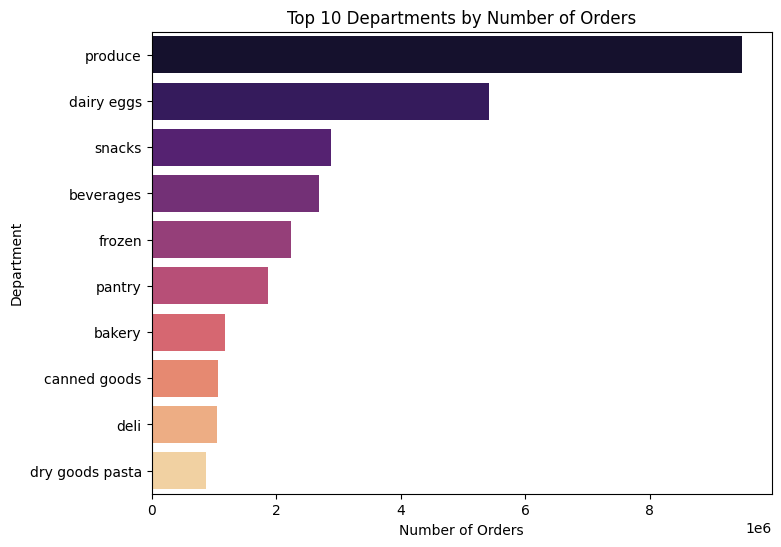

In [89]:
plt.figure(figsize=(8,6))
sns.barplot(y=top_departments.index, x=top_departments.values, palette="magma")
plt.title("Top 10 Departments by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.savefig("../visuals/top_10_departments.png")
plt.show()

In [51]:
top_departments

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
Name: count, dtype: int64

## Reorder ratio per product

In [52]:
reorder_ratio = (order_products_prior.groupby("product_id")["reordered"]
                 .mean()
                 .reset_index()
                 .merge(products, on="product_id")
                 .sort_values("reordered", ascending=False))

reorder_ratio.head(10)

,product_id,reordered,product_name,aisle_id,department_id
6430,6433,0.941176,Raw Veggie Wrappers,13,20
2074,2075,0.931034,Serenity Ultimate Extrema Overnight Pads,126,11
43545,43553,0.923077,Orange Energy Shots,64,7
27734,27740,0.920792,Chocolate Love Bar,45,19
14605,14609,0.914286,Soy Powder Infant Formula,92,18
13871,13875,0.911111,Simply Sleep Nighttime Sleep Aid,6,2
39984,39992,0.909091,"Energy Shot, Grape Flavor",64,7
31412,31418,0.900000,Sparking Water,115,7
5865,5868,0.900000,Russian River Valley Reserve Pinot Noir,28,5
35598,35604,0.900000,Maca Buttercups,45,19


In [53]:
top_reordered = reorder_ratio.sort_values("reordered", ascending=False).head(10)


C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\2030821506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reordered["product_name"], x=top_reordered["reordered"], palette="crest")


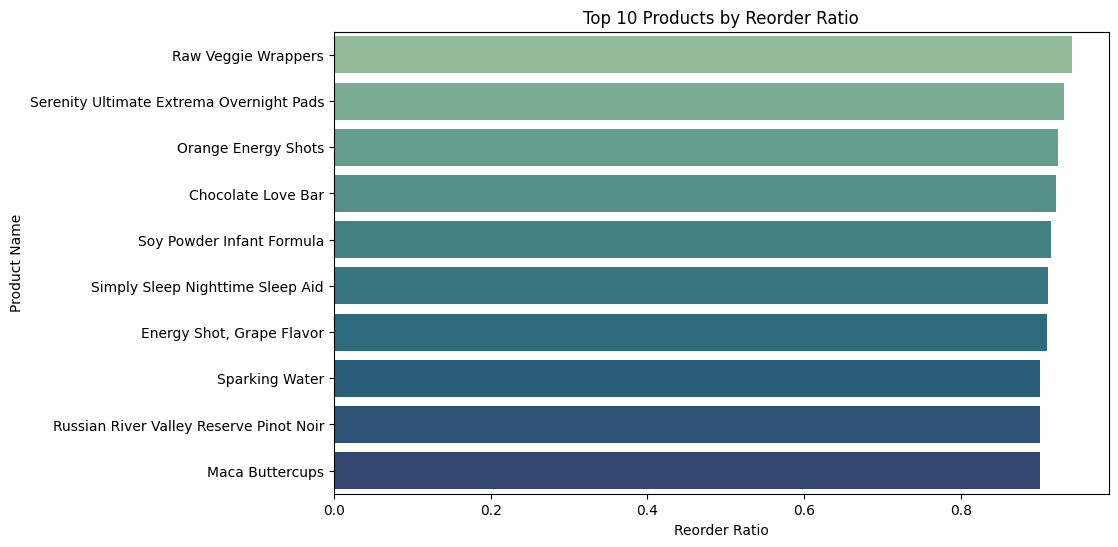

In [90]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_reordered["product_name"], x=top_reordered["reordered"], palette="crest")
plt.title("Top 10 Products by Reorder Ratio")
plt.xlabel("Reorder Ratio")
plt.ylabel("Product Name")
plt.savefig("../visuals/top_10_products_reorder.png")
plt.show()

In [55]:
top_reordered.head(1)

,product_id,reordered,product_name,aisle_id,department_id
6430,6433,0.941176,Raw Veggie Wrappers,13,20


> Global reorder rate

In [56]:
global_reorder_rate = order_products_prior["reordered"].mean()
print(f"Global reorder rate: {global_reorder_rate:.2f}")

Global reorder rate: 0.59


### Typical time gap between orders

### Days since prior order

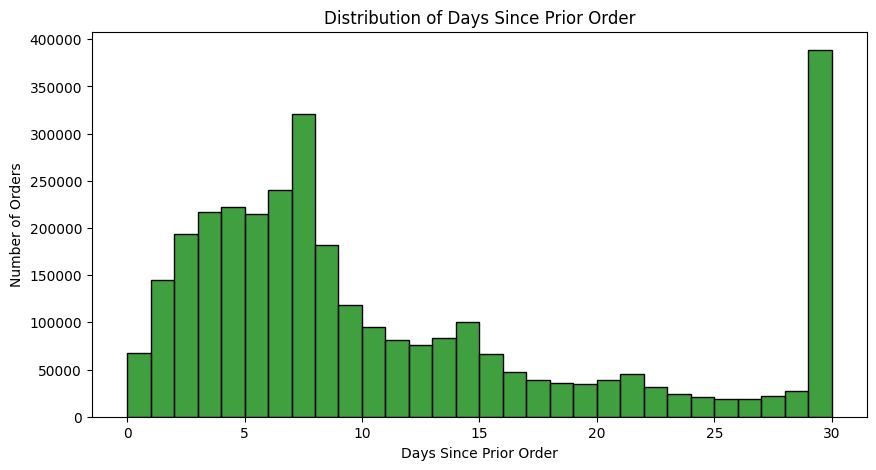

In [91]:
plt.figure(figsize=(10,5))
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30, color="green")
plt.title("Distribution of Days Since Prior Order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.savefig("../visuals/days_prior_orders.png")
plt.show()

## What products are most often ordered in the first basket?

In [59]:
order_products = pd.concat([order_products_prior, order_products_train])

In [60]:

first_orders = orders[orders["order_number"] == 1]


In [61]:
first_orders_products = order_products.merge(first_orders[["order_id", "user_id"]],
                                             on="order_id")


In [62]:
first_orders_products = first_orders_products.merge(products[["product_id", "product_name"]],
                                                    on="product_id")


In [67]:
product_counts = first_orders_products['product_name'].value_counts().head(15)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5288\1170182948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


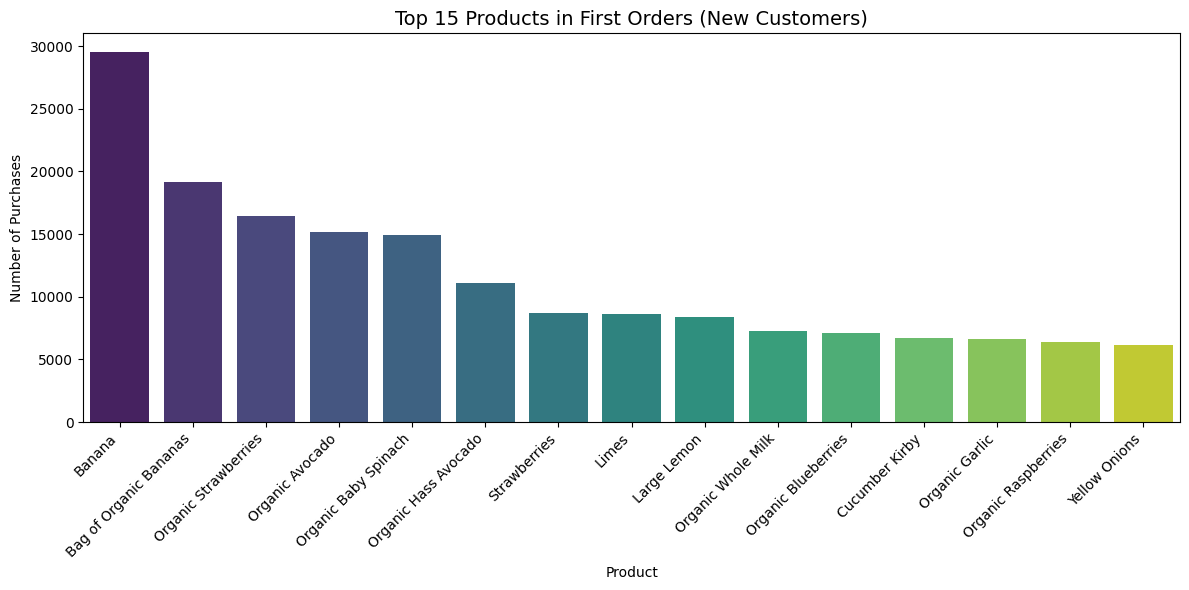

In [92]:
plt.figure(figsize=(12,6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.title("Top 15 Products in First Orders (New Customers)")
plt.title("Top 15 Products in First Orders (New Customers)", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha="right")
plt.savefig("../visuals/top_15_products_inthefirst_order.png")
plt.tight_layout()
plt.show()

# Business insights based on analysis



1. **Order times (days of the week, hours of the day)**

* Most purchases are made on weekends and in the morning.
     🔹 **Recommendation:** launch promotions and personalized offers during peak hours (e.g., Sunday morning) to encourage larger purchases.

2. **Average basket size**

* The average basket size is small (2–3 items).
     🔹 **Recommendation:** offer “add-ons” (cross-sell) — for example, if someone buys milk, offer them coffee or cereal.

3. **Most popular items, departments, and categories**

* There is a group of “must-have” products that almost all customers buy.
     🔹 **Recommendation:** focus on recommending items from the TOP 10 (such as “quick access” or “regularly ordered”).

4. **Reorder rate**

* Some products have a very high reorder rate.
     🔹 **Recommendation:** For these products, you can implement **automatic subscriptions** (“receive weekly”), which will increase customer loyalty.

5. **Interval between orders**

* There are clear cycles: some people order weekly, others every two weeks.
     🔹 **Recommendation:** segment customers according to this interval and send reminders before their typical “purchase time.”

6. **New customers**

* New customers place small orders at first.
     🔹 **Recommendation:** offer them **welcome bonuses** (a discount on their second order, recommendations for popular products in the first few weeks).